# Machine Learning Model for Predicting a Ship's Crew Size 
We build a simple model using the cruise_ship_info.csv data set for predicting a ship's crew size. This project is organized as follows: (a) data proprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Benjamin O. Tayo
Date: 4/8/2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read dataset and display columns

In [2]:
df=pd.read_csv("cruise_ship_info.csv")

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


# 2. Calculate basic statistics of the data

In [4]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [5]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

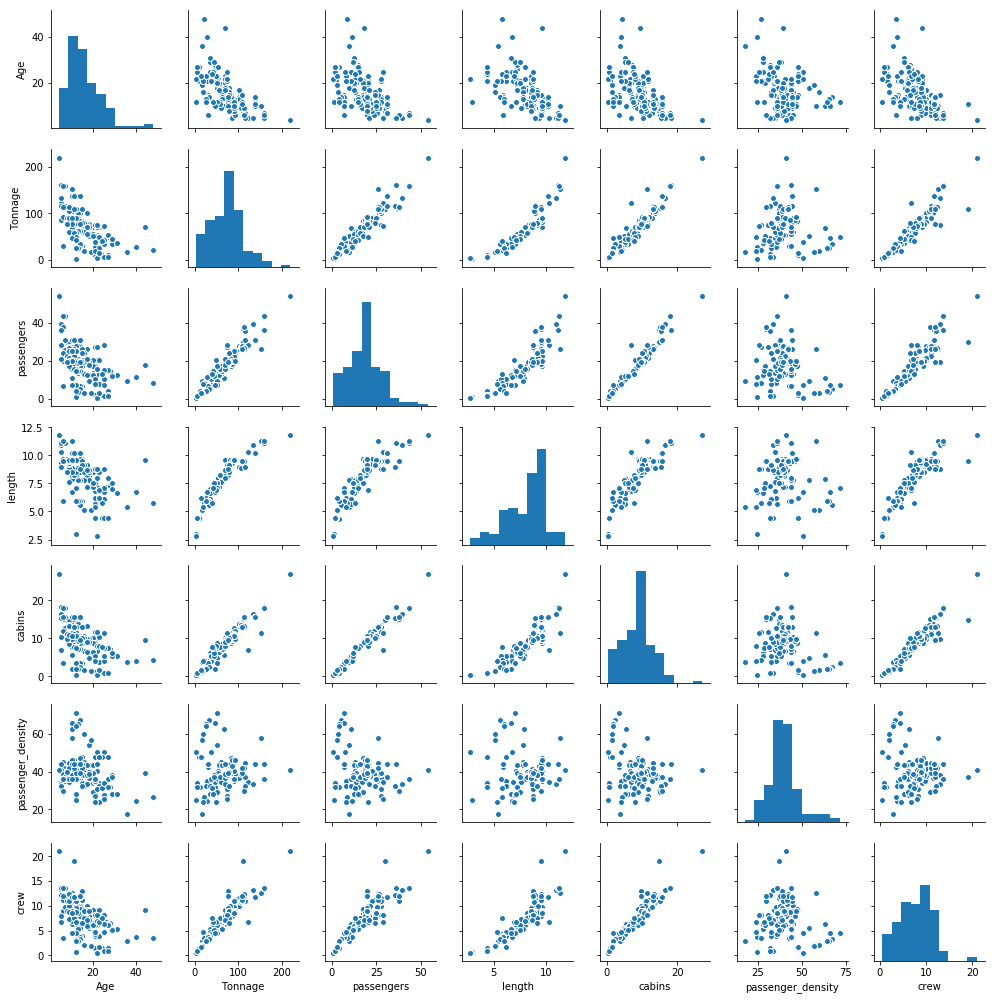

In [6]:
sns.pairplot(df[cols], size=2.0)

# Observations from part 2
1) We observe that variables are on different scales, for sample the Age variable ranges from about 16 years to 48 years, while the Tonnage variable ranges from 2 to 220, see probability density plots below. It is therefore important that when a regression model is built using these variables, variables be brought to same scale either by standardizing or normalizing the data.

2) We also observe that the target variable 'crew' correlates well with 4 predictor variables, namely, 'Tonnage', 'passengers', 'length', and 'cabins'.

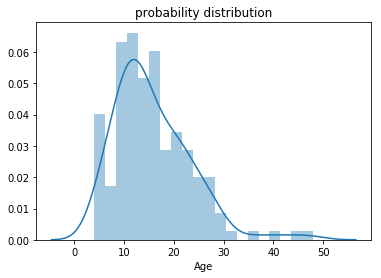

In [7]:
sns.distplot(df['Age'],bins=20)
plt.title('probability distribution')
plt.show()

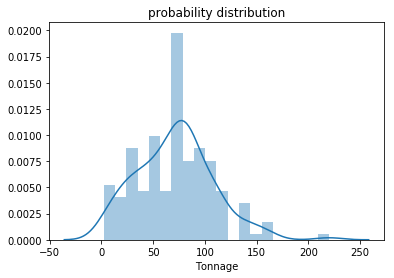

In [8]:
sns.distplot(df['Tonnage'],bins=20)
plt.title('probability distribution')
plt.show()

# 3. Variable selection for predicting "crew" size

# 3 (a) Calculation of covariance matrix

In [9]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

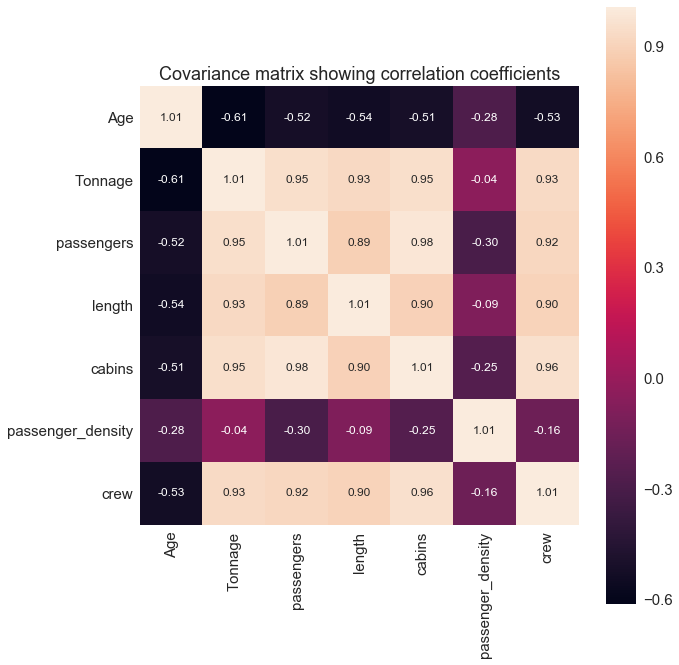

In [10]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

# 3 (b) Selecting important variables (columns)
From the covariance matrix plot above, we see that the "crew" variable correlates strongly with 4 predictor variables: "Tonnage", "passengers", "length, and "cabins".

In [11]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']

In [12]:
df[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [13]:
X = df[cols_selected].iloc[:,0:4].values    # features matrix 
y = df[cols_selected]['crew'].values        # target variable

In [14]:
X.shape

(158, 4)

In [15]:
y.shape

(158,)

# 4. One-hot encoding for categorical features

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,23,70.367,20.56,8.55,10.22,34.23,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,19,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,110.239,37.00,9.51,14.87,29.79,11.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])  

In [18]:
df2.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


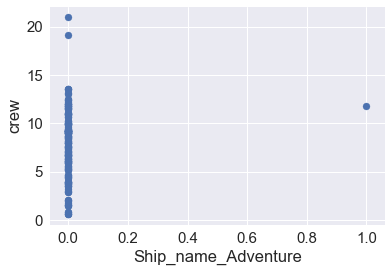

In [19]:
plt.scatter(df2['Ship_name_Adventure'],df2['crew'])
plt.xlabel('Ship_name_Adventure')
plt.ylabel('crew')
plt.show()

# Observations from part 4

In order to build a simplified regression model, we shall focus only on ordinal features. The categorical features "Ship_name"	and "Cruise_line" will not be used. A simple model built using only the 4 ordinal features "Tonnage", "passengers", "length, and "cabins" will be simple to interpret.

# 5. Data partitioning into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']                 

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# 6. Building a muilt-regression model

Our machine learning regression model for predicting a ship's "crew" size can be expressed as:

$$ \hat{y}_{i} = w_0 + \sum_{j=1}^{4} X_{ij} w_j $$

In [22]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

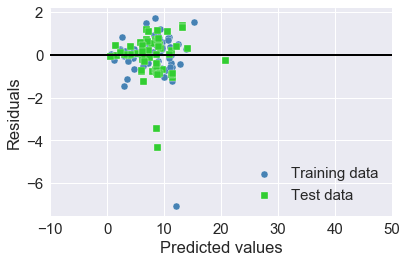

In [23]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

# Evaluation of regression model

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.955, test: 0.889
R^2 train: 0.920, test: 0.928


# Regression coefficients

In [25]:
slr.fit(X_train, y_train).intercept_

-0.7525074496158393

In [26]:
slr.fit(X_train, y_train).coef_

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

# 7. Feature Standardization, Cross Validation, and Hyper-parameter Tuning

In [27]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

In [28]:
train_score = []
test_score = []

In [29]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

In [30]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [31]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [32]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.929 +/- 0.013


In [33]:
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 test: 0.912 +/- 0.021


# 8. Techniques of Dimensionality Reduction

# 8 (a) Principal Component Analysis (PCA)

In [34]:
train_score = []
test_score = []
cum_variance = []

In [35]:
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

In [36]:
train_score

array([0.90411898, 0.9041488 , 0.90416405, 0.92028261])

In [37]:
test_score

array([0.89217843, 0.89174896, 0.89159266, 0.92827978])

In [38]:
cum_variance

array([0.949817  , 0.98322819, 0.99587366, 1.        ])

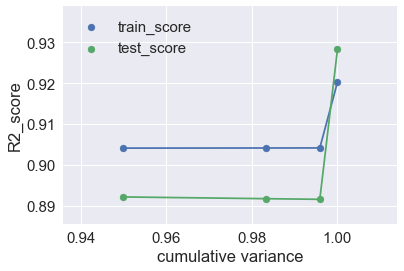

In [39]:
plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

# Observations: PCA

We observe that by increasing the number of principal components from 1 to 4, the train and test scores improve. This is because with less components, there is high bias error in the model, since model is overly simplified. As we increase the number of principal components, the bias error will reduce, but complexity in the model increases.

# 8 (b) Regularized Regression: Lasso

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)

In [41]:
alpha = np.linspace(0.01,0.4,10)

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)

r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    r2_train=np.append(r2_train,r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))

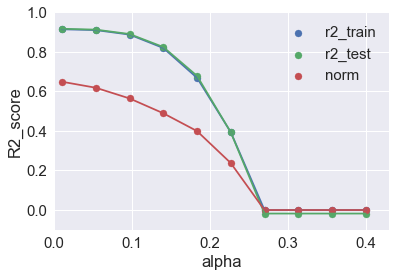

In [43]:
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

# # Observations: Lasso

We observe that as the regularization parameter $\alpha$ increases, the norm of the regression coefficients become smaller and smaller. This means more regression coefficients are forced to zero, which intend increases bias error (over simplification). The best value to balance bias-variance tradeoff is when $\alpha$ is kept low, say $\alpha = 0.1$ or less.